# Dogs vs. Cats with Tensorflow and Python

![](data/woof_meow.jpg)

## Dependencies

In [1]:
%matplotlib inline
import matplotlib

import os
from skimage import color, io
from scipy.misc import imresize
from glob import glob
import random as rnd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn

from sklearn.model_selection import train_test_split

## Preprocess the labeled data

In [2]:
data_path = './data/train'
image_size = 128

cat_files_path = os.path.join(data_path + '/cats', 'cat.*.jpg')
dog_files_path = os.path.join(data_path + '/dogs', 'dog.*.jpg')

cat_files = sorted(glob(cat_files_path))
dog_files = sorted(glob(dog_files_path))

file_count = len(cat_files) + len(dog_files)

file_count = 2000
allX = np.zeros((file_count, image_size, image_size, 3), dtype='float64')
ally = np.zeros(file_count)
count = 0
for f in cat_files[:1000]:
    try:
        img = io.imread(f)
        new_img = imresize(img, (image_size, image_size, 3))
        new_img = np.array(new_img) / 255.
        allX[count] = new_img
        ally[count] = 0
        count += 1
    except:
        continue

for f in dog_files[:1000]:
    try:
        img = io.imread(f)
        new_img = imresize(img, (image_size, image_size, 3))
        new_img = np.array(new_img) / 255.
        allX[count] = np.array(new_img)
        ally[count] = 1
        count += 1
    except:
        continue
file_count = count

In [3]:
allX.shape

(2000, 128, 128, 3)

In [4]:
ally.shape

(2000,)

## Data insights

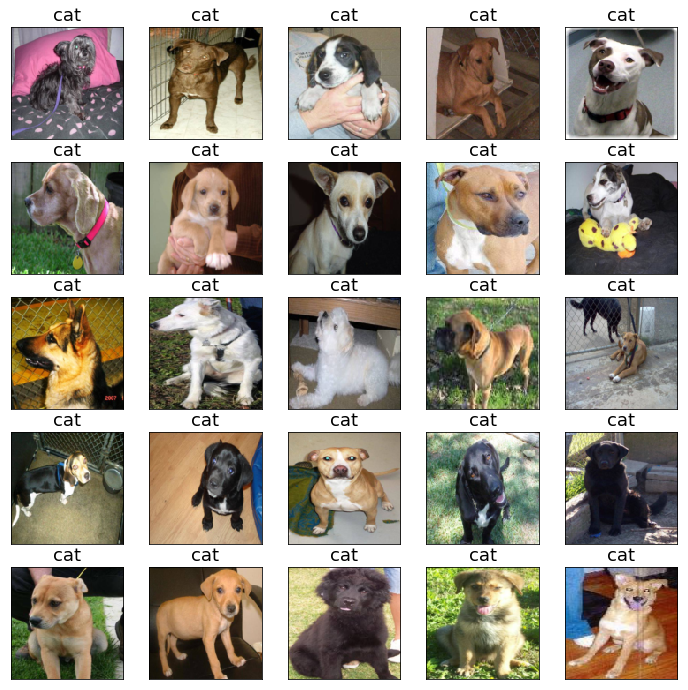

In [8]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)

for num,img_data in enumerate(allX[1000:1025]):
    sub = fig.add_subplot(5,5,num+1)
    sub.imshow(img_data, cmap="hot")
    plt.title('cat', fontsize=18)
    sub.axes.get_xaxis().set_visible(False)
    sub.axes.get_yaxis().set_visible(False)
plt.show()


## Train

## Measure against unseen test set